In [30]:
import pandas as pd
import numpy as np

In [229]:
df = pd.read_csv('All orders - short custom description.csv', low_memory=False)
df.drop_duplicates(inplace=True)
df['customs_description'] = df['customs_description'].astype(str)
df['F_Cat'] = df['F_Cat'].astype(str)
df['quantity'] = df['quantity'].astype(int)

In [230]:
import matplotlib
list_colours = []
for name, hex in matplotlib.colors.cnames.items():
    name = name.title()
    list_colours.append(name)

# list_colours = []
colours_df = pd.read_csv('colours.csv')
colours_df['colours'] = colours_df['colours'].str.strip()
for j in colours_df['colours'].unique().tolist():
    list_colours.append(j)

for i in list_colours:
    i = i.title()

list_colours = list(dict.fromkeys(list_colours))

df['colour'] = df['title'].str.findall(r'(?i)\b(?:{})\b'.format('|'.join(list_colours))).apply(', '.join)

df2 = df['colour'].str.split(',', expand=True)
df['colour'] = df2[0]

In [231]:
df = df[(df['date'] >= '2024-01-01') & (df['date'] <= '2024-01-31')]
df = df[df['Channel'] == 'Debenhams']
# df = df[df['customs_description'] == 'Ladies > Leather Jackets']

df.tail(2)

,order_date,order_id,quantity,order_state,grand_total_inc,reference,price_inc,date,Channel,title,...,model,manufacturer_name,attribute_summary,customs_description,colour,F_Cat,S_Cat,T_Cat,Category,time
79501,31/01/2024 - 22:16:19,DUX025937060-A,1,Order Dispatched,49.49,4925300,49.49,2024-01-31,Debenhams,Ashwood Real Leather Flapover Crossbody Bag 2 ...,...,64295,NaN,Size: One Size,Ladies > Handbags,2 Tone Tan,Ladies > Handbags,NaN,NaN,Handbags > Ashwood,22:16:19
79502,31/01/2024 - 23:08:39,DUX025938612-A,1,Order Dispatched,44.99,4474000,44.99,2024-01-31,Debenhams,Women's Leather Shoulder Handbag Black: 63787,...,63787,ASHWOOD,Size: One Size,Ladies > Handbags,Black,Ladies > Handbags,NaN,NaN,Handbags > Cross Body Bag,23:08:39


In [232]:
df.groupby('customs_description')['price_inc'].sum().sort_values(ascending=False), df.groupby('customs_description')['quantity'].sum().sort_values(ascending=False)

(customs_description
 Ladies > Handbags               66004.71
 Ladies > Leather Jackets         7149.50
 (No assigned category)           2954.98
 Ladies > Purses                  2815.10
 Sale                             2109.02
 Mens > Accessories               1344.75
 Luggage                          1336.37
 Mens > Man Bags & Briefcases      978.71
 Mens > Wallets                    757.60
 Gift & Accessories                493.06
 Ladies > Footwear                 104.37
 Name: price_inc, dtype: float64,
 customs_description
 Ladies > Handbags               1589
 Ladies > Purses                  100
 (No assigned category)            62
 Sale                              62
 Ladies > Leather Jackets          51
 Mens > Accessories                45
 Mens > Wallets                    40
 Mens > Man Bags & Briefcases      29
 Gift & Accessories                14
 Luggage                           14
 Ladies > Footwear                  3
 Name: quantity, dtype: int32)

In [233]:
df.groupby('customs_description')['price_inc'].sum().sort_values(ascending=False), df.groupby('customs_description')['quantity'].sum().sort_values(ascending=False)

(customs_description
 Ladies > Handbags               66004.71
 Ladies > Leather Jackets         7149.50
 (No assigned category)           2954.98
 Ladies > Purses                  2815.10
 Sale                             2109.02
 Mens > Accessories               1344.75
 Luggage                          1336.37
 Mens > Man Bags & Briefcases      978.71
 Mens > Wallets                    757.60
 Gift & Accessories                493.06
 Ladies > Footwear                 104.37
 Name: price_inc, dtype: float64,
 customs_description
 Ladies > Handbags               1589
 Ladies > Purses                  100
 (No assigned category)            62
 Sale                              62
 Ladies > Leather Jackets          51
 Mens > Accessories                45
 Mens > Wallets                    40
 Mens > Man Bags & Briefcases      29
 Gift & Accessories                14
 Luggage                           14
 Ladies > Footwear                  3
 Name: quantity, dtype: int32)

In [234]:
len(df[df['customs_description'] == 'Ladies > Leather Jackets'][['title']].value_counts())

13

In [235]:
df['title'].value_counts()

title
Ashwood Leather Crossbody Bag Black: 64033                                 99
Real Leather Tote Bag 2 Tone Tan: 63754                                    55
Real Leather Tote Bag Black: 63754                                         43
Ashwood Leather Crossbody Smart Phone Bag - Black: PH-2                    39
Ashwood Leather Crossbody Bag Black: CB-5                                  35
                                                                           ..
Ashwood Medium Leather Cross Body Bag Winter Sky: J-11                      1
Vegetable Tanned Leather Two Section With Mid Purse Bag Chestnut : V-26     1
Ashwood Leather Messenger Bag – Cognac: FE08                                1
Small Leather Flight Side Bag- Murphy - Chestnut/vt                         1
Crocodile Print Cross Body Bag Grey – 62753                                 1
Name: count, Length: 294, dtype: int64

In [236]:
temp_dispatched = df[(df['order_state'] == 'Order Dispatched') | (df['order_state'] == 'Order Refunded')]
temp_refunded = df[df['order_state'] == 'Order Refunded']

In [237]:
temp_dispatched.groupby('customs_description')['price_inc'].sum().sort_values(ascending=False), temp_dispatched.groupby('customs_description')['quantity'].sum().sort_values(ascending=False)

(customs_description
 Ladies > Handbags               65969.17
 Ladies > Leather Jackets         7149.50
 (No assigned category)           2954.98
 Ladies > Purses                  2815.10
 Sale                             2109.02
 Mens > Accessories               1344.75
 Luggage                          1336.37
 Mens > Man Bags & Briefcases      978.71
 Mens > Wallets                    757.60
 Gift & Accessories                493.06
 Ladies > Footwear                 104.37
 Name: price_inc, dtype: float64,
 customs_description
 Ladies > Handbags               1588
 Ladies > Purses                  100
 (No assigned category)            62
 Sale                              62
 Ladies > Leather Jackets          51
 Mens > Accessories                45
 Mens > Wallets                    40
 Mens > Man Bags & Briefcases      29
 Gift & Accessories                14
 Luggage                           14
 Ladies > Footwear                  3
 Name: quantity, dtype: int32)

In [238]:
temp_refunded.groupby('customs_description')['price_inc'].sum().sort_values(ascending=False), temp_refunded.groupby('customs_description')['quantity'].sum().sort_values(ascending=False)

(customs_description
 Ladies > Handbags               9689.72
 Ladies > Leather Jackets        1958.36
 (No assigned category)           386.92
 Luggage                          370.97
 Sale                             287.92
 Ladies > Purses                  208.73
 Mens > Accessories               149.75
 Mens > Man Bags & Briefcases      76.48
 Gift & Accessories                35.99
 Ladies > Footwear                 35.99
 Mens > Wallets                    17.99
 Name: price_inc, dtype: float64,
 customs_description
 Ladies > Handbags               214
 Ladies > Leather Jackets         14
 (No assigned category)            8
 Sale                              8
 Ladies > Purses                   7
 Mens > Accessories                5
 Luggage                           3
 Mens > Man Bags & Briefcases      2
 Gift & Accessories                1
 Ladies > Footwear                 1
 Mens > Wallets                    1
 Name: quantity, dtype: int32)

In [174]:
df.shape

(51, 21)

In [175]:
df['model'] = df['model'].fillna("(No assigned category)")
df['colour'] = df['colour'].fillna("(No assigned colour)")
df['attribute_summary'] = df['attribute_summary'].fillna("(No assigned size)")

In [176]:
# temp_dispatched = df[df['order_state'] == 'Order Dispatched']
temp_dispatched = df[(df['order_state'] == 'Order Dispatched') | (df['order_state'] == 'Order Refunded')]
temp_refunded = df[df['order_state'] == 'Order Refunded']

print(temp_dispatched.shape, temp_refunded.shape)

# temp_temp = temp_refunded.copy()
# temp_temp['order_state'] = 'Order Dispatched'
# temp_dispatched = pd.concat([temp_dispatched, temp_temp], ignore_index=True)
# print(temp_dispatched.shape, temp_refunded.shape)

# Col1_value = set(temp_dispatched['order_id'].unique())
# temp_refunded['exists'] = temp_refunded['order_id'].map(lambda x : True if x in Col1_value  else False) 

# temp_refunded = temp_refunded[temp_refunded['exists'] == True]
# temp_refunded

(51, 21) (14, 21)


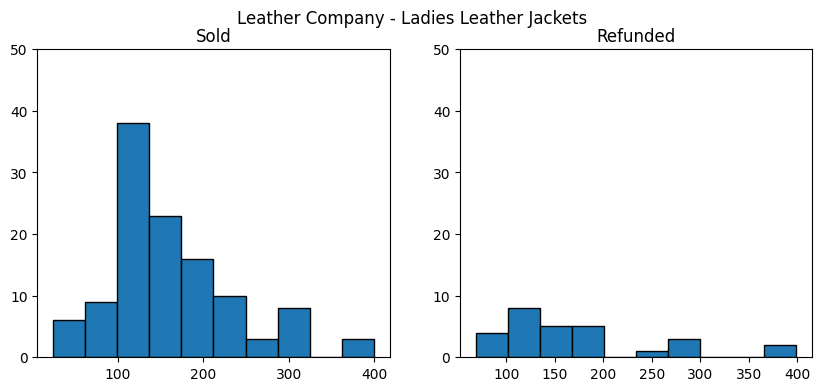

<Figure size 2000x600 with 0 Axes>

In [169]:
# Leather Company
import matplotlib.pyplot as plt

temp_dispatched = temp_dispatched[temp_dispatched['price_inc'] < 400]
temp_refunded = temp_refunded[temp_refunded['price_inc'] < 400]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Leather Company - Ladies Leather Jackets')
plt.figure(figsize=(20,6))
bins = [109, 119, 129, 139, 149, 159, 169, 179]
ax1.hist(temp_dispatched['price_inc'], bins=10, edgecolor="k")
ax1.set_title('Sold')
ax2.hist(temp_refunded['price_inc'], bins=10, edgecolor="k")
ax2.set_title('Refunded')
y_bins = [0, 10, 20, 30, 40, 50]
ax1.set_yticks(y_bins)
ax2.set_yticks(y_bins)
# ax1.set_xticks(bins)
# ax2.set_xticks(bins)
plt.show()

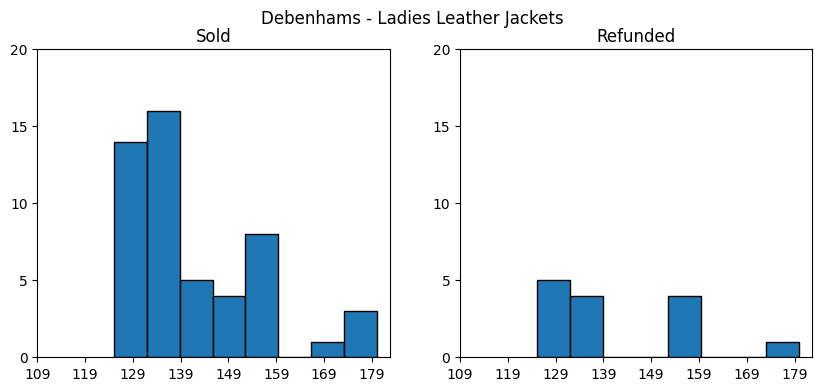

<Figure size 2000x600 with 0 Axes>

In [177]:
# Debenhams
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Debenhams - Ladies Leather Jackets')
plt.figure(figsize=(20,6))
bins = [109, 119, 129, 139, 149, 159, 169, 179]
ax1.hist(temp_dispatched['price_inc'], bins=8, edgecolor="k")
ax1.set_title('Sold')
ax2.hist(temp_refunded['price_inc'], bins=8, edgecolor="k")
ax2.set_title('Refunded')
ax1.set_yticks([0, 5, 10, 15, 20])
ax2.set_yticks([0, 5, 10, 15, 20])
ax1.set_xticks(bins)
ax2.set_xticks(bins)
plt.show()

In [38]:
# All channels
temp_dispatched.describe()

,quantity,grand_total_inc,reference,price_inc,line,S_Cat,T_Cat
count,470.0,470.000000,4.700000e+02,470.00000,395.000000,0.0,0.0
mean,1.0,219.915221,3.728435e+06,204.70833,87771.979747,NaN,NaN
std,0.0,204.514179,1.341361e+06,176.66000,6422.885156,NaN,NaN
min,1.0,29.980000,3.915030e+05,20.82500,36454.000000,NaN,NaN
25%,1.0,125.100000,3.191105e+06,125.10000,86992.000000,NaN,NaN
50%,1.0,152.100000,4.187404e+06,149.00000,88933.000000,NaN,NaN
75%,1.0,206.100000,4.823504e+06,199.00000,90286.000000,NaN,NaN
max,1.0,1444.990000,5.002903e+06,1395.00000,92379.000000,NaN,NaN


In [54]:
# Leather Company
temp_dispatched.describe()

,quantity,grand_total_inc,reference,price_inc,line,S_Cat,T_Cat
count,374.0,374.000000,3.740000e+02,374.000000,374.000000,0.0,0.0
mean,1.0,240.621588,3.463972e+06,221.511324,88732.585561,NaN,NaN
std,0.0,224.561545,1.380243e+06,194.413807,1839.190923,NaN,NaN
min,1.0,29.980000,3.915030e+05,20.825000,85187.000000,NaN,NaN
25%,1.0,129.000000,2.266604e+06,116.624750,87162.250000,NaN,NaN
50%,1.0,167.411500,4.062907e+06,149.562500,88970.000000,NaN,NaN
75%,1.0,249.000000,4.687102e+06,229.000000,90289.750000,NaN,NaN
max,1.0,1444.990000,5.002903e+06,1395.000000,91611.000000,NaN,NaN


In [46]:
# Debenhams
temp_dispatched.describe()

,quantity,grand_total_inc,reference,price_inc,line,S_Cat,T_Cat
count,96.0,96.000000,9.600000e+01,96.000000,21.000000,0.0,0.0
mean,1.0,139.246667,4.758738e+06,139.246667,70664.047619,NaN,NaN
std,0.0,15.130765,2.337913e+05,15.130765,20616.401918,NaN,NaN
min,1.0,112.590000,4.170101e+06,112.590000,36454.000000,NaN,NaN
25%,1.0,125.100000,4.857705e+06,125.100000,62646.000000,NaN,NaN
50%,1.0,134.100000,4.860106e+06,134.100000,79339.000000,NaN,NaN
75%,1.0,152.100000,4.862807e+06,152.100000,89380.000000,NaN,NaN
max,1.0,179.990000,4.949509e+06,179.990000,92379.000000,NaN,NaN


In [20]:
temp_dispatched = temp_dispatched.groupby(['model', 'colour', 'attribute_summary']).sum()
temp_dispatched.rename(columns={'quantity': 'Units Sold', 'price_inc': 'Total Revenue (£)'}, inplace=True)
# temp_dispatched = temp_dispatched.reset_index()
# temp_dispatched.rename(columns={'quantity': 'Units Sold', 'price_inc': 'Total Revenue', 'title': 'Product',
#                               'attribute_summary': 'Size', 'reference': 'SKU Reference', 'model': 'Model'}, inplace=True)
# temp_dispatched['Total Revenue'] = temp_dispatched['Total Revenue'].astype(int)


temp_refunded = temp_refunded.groupby(['model', 'colour', 'attribute_summary']).sum()
temp_refunded.rename(columns={'quantity': 'Units Refunded', 'price_inc': 'Total Refund (£)'}, inplace=True)
# temp_refunded = temp_refunded.reset_index()
# temp_refunded.rename(columns={'quantity': 'Units Refunded', 'price_inc': 'Total Refund', 'title': 'Product',
#                               'attribute_summary': 'Size', 'reference': 'SKU Reference', 'model': 'Model'}, inplace=True)
# temp_refunded['Total Refund'] = temp_refunded['Total Refund'].astype(int)


# temp_dispatched = temp_dispatched[['Product', 'Size', 'SKU Reference', 'Model', 'Units Sold', 'Total Revenue']]
# temp_refunded = temp_refunded[['Product', 'Size', 'SKU Reference', 'Model', 'Units Refunded', 'Total Refund']]

In [10]:
temp = pd.concat([temp_dispatched, temp_refunded], axis=1)
temp = temp[['Units Sold', 'Total Revenue (£)', 'Units Refunded', 'Total Refund (£)']]
temp['Units Sold'] = temp['Units Sold'].fillna(0)
temp['Total Revenue (£)'] = temp['Total Revenue (£)'].fillna(0)
temp['Units Refunded'] = temp['Units Refunded'].fillna(0)
temp['Total Refund (£)'] = temp['Total Refund (£)'].fillna(0)
temp.loc['Total', :] = temp.sum(numeric_only=True).values
temp['Units Sold'] = temp['Units Sold'].astype(int)
temp['Units Refunded'] = temp['Units Refunded'].astype(int)
temp['Total Revenue (£)'] = temp['Total Revenue (£)'].astype(int)
temp['Total Refund (£)'] = temp['Total Refund (£)'].astype(int)

In [11]:
temp

Units Sold  Total Revenue (£)  \
model      colour   attribute_summary                                  
AWL-281    Black    Size: 16                    1                152   
                    Size: 24                    1                179   
                    Size: 8                     1                152   
MB139      Burgundy Size: 14                    1                152   
           Navy     Size: 22                    1                174   
           Red      Size: 16                    1                152   
                    Size: 18                    1                152   
                    Size: 22                    1                174   
           Tan      Size: 14                    1                152   
                    Size: 20                    1                166   
awl-284    Black    Size: 10                    1                134   
                    Size: 12                    2                268   
                    Size: 14                    2                268   
                    Size: 16                    1                134   
                    Size: 22                    2                304   
                    Size: 24                    1                157   
           Navy     Size: 12                    2                268   
                    Size: 22                    1                152   
           Oxblood  Size: 12                    2                268   
           Tan      Size: 20                    1                143   
                    Size: 8                     2                268   
           Taupe    Size: 12                    1                134   
                    Size: 16                    1                134   
                    Size: 24                    1                157   
awl-blazer Black    Size: 12                    1                125   
                    Size: 16                    1                125   
                    Size: 20                    2                268   
                    Size: 22                    2                286   
                    Size: 8                     1                125   
           Tan      Size: 10                    1                125   
                    Size: 12                    3                375   
                    Size: 14                    1                125   
                    Size: 18                    3                375   
                    Size: 22                    2                286   
                    Size: 24                    1                152   
awl-n30    Black    Size: 10                    1                125   
                    Size: 14                    1                125   
                    Size: 16                    1                125   
Total                                          51               7149   

                                       Units Refunded  Total Refund (£)  
model      colour   attribute_summary                                    
AWL-281    Black    Size: 16                        1               152  
                    Size: 24                        1               179  
                    Size: 8                         0                 0  
MB139      Burgundy Size: 14                        0                 0  
           Navy     Size: 22                        0                 0  
           Red      Size: 16                        0                 0  
                    Size: 18                        1               152  
                    Size: 22                        0                 0  
           Tan      Size: 14                        1               152  
                    Size: 20                        0                 0  
awl-284    Black    Size: 10                        1               134  
                    Size: 12                        1               134  
                    Size: 14                      

In [529]:
temp.to_excel('Leather Company - Dec 2023 - Ladies Leather Jackets.xlsx')